                              NAME :  ANJALI SINGH
                               ROLL NO.18BTCSE0046
                           MACHINE LEARNING :ASSIGNMENT
                            PYTORCH LINEAR REGRESSION





In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn


In [2]:
#Loading the data set
data=pd.read_csv('/content/Salary_Data.csv')
#let us try to visualize our data 
data.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.shape

(30, 2)

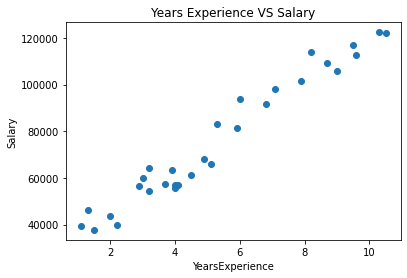

In [4]:
# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Years Experience VS Salary")
plt.show()

In [5]:
#Splitting the dataset into  training and testing dataset
train, test = train_test_split(data,  test_size = 0.2)



In [6]:
#Converting training data into tensors for Pytorch
X_train = torch.Tensor([[x] for x in list(train.YearsExperience)])
y_train = torch.torch.FloatTensor([[x] for x in list(train.Salary)])

In [7]:
#Converting test data into tensors for Pytorch
X_test = torch.Tensor([[x] for x in list(test.YearsExperience)])
y_test = torch.torch.FloatTensor([[x] for x in list(test.Salary)])

In [8]:
#Data set & Data set Loader
from torch.utils.data import TensorDataset
train_data=TensorDataset(X_train, y_train)
train_data[0:5]

(tensor([[4.0000],
         [3.2000],
         [4.9000],
         [5.1000],
         [3.9000]]), tensor([[55794.],
         [64445.],
         [67938.],
         [66029.],
         [63218.]]))

In [9]:
# Define data loader
from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(train_data, batch_size, shuffle=True)

In [10]:
# Define model
model = nn.Linear(1, 1) # nn.Linear(in_features,out_features)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.1949]], requires_grad=True)
Parameter containing:
tensor([-0.9428], requires_grad=True)


In [11]:
# printing the model Parameters
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1949]], requires_grad=True), Parameter containing:
tensor([-0.9428], requires_grad=True)]


In [12]:
#Define the loss function
loss_fun = nn.MSELoss()

In [13]:
# Define SGD optimizer with learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [14]:
# Utility function to train the model
def lrmodel(num_epochs, model, loss_fun, optimizer, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fun(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            optimizer.step()
            
            # 5. Reset the gradients to zero
            optimizer.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
#Training for 100 epochs
num_epochs=100
lrmodel(num_epochs, model, loss_fun, optimizer, train_dl)
# Generate predictions
preds = model(X_train)
preds
# Compare with targets
y_train

Epoch [10/100], Loss: 261542672.0000
Epoch [20/100], Loss: 75091472.0000
Epoch [30/100], Loss: 32221832.0000
Epoch [40/100], Loss: 88051128.0000
Epoch [50/100], Loss: 73669360.0000
Epoch [60/100], Loss: 51497724.0000
Epoch [70/100], Loss: 44681472.0000
Epoch [80/100], Loss: 37381928.0000
Epoch [90/100], Loss: 51177900.0000
Epoch [100/100], Loss: 12251484.0000


tensor([[ 55794.],
        [ 64445.],
        [ 67938.],
        [ 66029.],
        [ 63218.],
        [ 39891.],
        [122391.],
        [116969.],
        [ 83088.],
        [ 54445.],
        [ 61111.],
        [105582.],
        [ 81363.],
        [ 60150.],
        [ 57189.],
        [ 43525.],
        [ 98273.],
        [121872.],
        [ 57081.],
        [ 56957.],
        [ 46205.],
        [101302.],
        [ 39343.],
        [113812.]])

In [15]:
#Predicting for X_test
y_pred_test = model(X_test)
#Converting predictions from tensor objects into a list
y_pred_test = [y_pred_test[x].item() for x in range(len(y_pred_test))]
# Comparing Actual and predicted values
df = {}
df['Actual Observation'] = y_test
df['Predicted Salary'] = y_pred_test
df = pd.DataFrame(df)
print(df)

   Actual Observation  Predicted Salary
0   (tensor(91738.),)      88920.765625
1   (tensor(37731.),)      37297.015625
2   (tensor(56642.),)      50933.476562
3  (tensor(112635.),)     116193.695312
4   (tensor(93940.),)      81128.500000
5  (tensor(109431.),)     107427.390625
